# Feature Analysis Statistics
Provides various statistics about features in the context of a binary classifier. The study is limited to transcription factors (reglators).

In [1]:
import init
import common.constants as cn
import common_python.constants as ccn
from common.trinary_data import TrinaryData
from common.data_provider import DataProvider
import classifier.main_multi_classifier_feature_optimizer as main
from common.data_provider import DataProvider
from common_python.plots import util_plots
from plots import util_plots as xutil_plots
from common_python.classifier import feature_analyzer
from common_python.util import util

import datetime
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import svm

%matplotlib inline

In [2]:
# These are the "long" data that have individual replications, not averages. And, only using TFs.
TRINARY = TrinaryData(is_averaged=False, is_dropT1=False, is_regulator=True)  # Trinary data
DF_X = TRINARY.df_X
SER_Y = TRINARY.ser_y
STATES = SER_Y.unique()
REGULATORS = DF_X.columns.tolist()
DATA_PATH = cn.PROJECT_DIR
for directory in ["data", "feature_analyzer"]:
    DATA_PATH = os.path.join(DATA_PATH, directory)
BASE_PATH = os.path.join(DATA_PATH, "main_feature_analyzer_%s_%d.csv") 
CLF = svm.LinearSVC()

In [3]:
# Construct an FeatureAnalyzer for each sate
ANALYZERS = []
for state in STATES:
    dct = {m: BASE_PATH  % (m, state) for m in feature_analyzer.METRICS}
    analyzer = feature_analyzer.FeatureAnalyzer(
        CLF, DF_X, SER_Y,
        data_path_dct=dct)
    ANALYZERS.append(analyzer)

In [4]:
# Non-zero regulators by state
def getNZRegulators():
    dct = {}
    for state in STATES:
        analyzer = ANALYZERS[state]
        df = util.pruneZeroes(analyzer.getMetric(feature_analyzer.CPC))
        dct[state] = df.columns.tolist()
    return dct

In [5]:
NZ_REGULATOR_DCT = getNZRegulators()

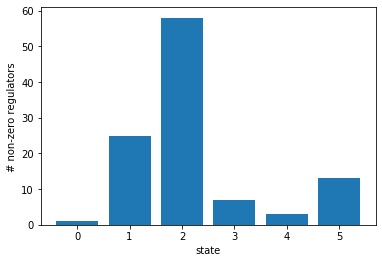

In [6]:
# Number of non-zero regulators by state
num_regulators = [len(NZ_REGULATOR_DCT[s]) for s in STATES]
plt.bar(STATES, num_regulators )
_ = plt.xlabel("state")
_ = plt.ylabel("# non-zero regulators")

In [7]:
NZ_REGULATOR_DCT[0]

['Rv1990c']

## Single Feature Accuracy (SFA)

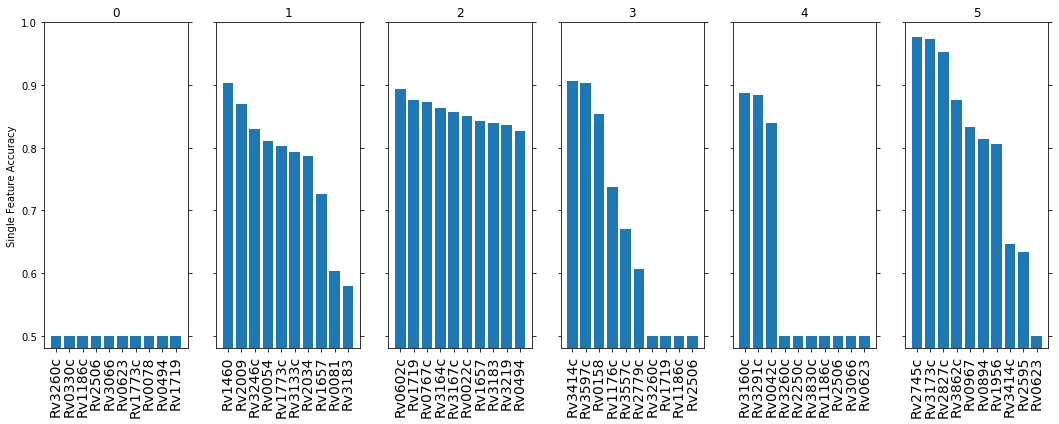

In [8]:
feature_analyzer.plotSFA(ANALYZERS)

# Classifier Prediction Correlation (CPC)
Delete rows and columns with 0 values.
Heat map for the remainder.

In [19]:
# For each state, plot the accuracy of a single regulator classifier
def plotCPC(state):
    print("\n*** State %d" % state)
    analyzer = ANALYZERS[state]
    df = util.pruneZeroes(analyzer.getMetric(feature_analyzer.CPC))
    if len(df) > 1:
        cg = seaborn.clustermap(df, col_cluster=True,
              row_cluster=True,
              vmin=-1, vmax=1,
              cbar_kws={"ticks":[-1, 0, 1]}, cmap="seismic")
        plt.title("State %d" % state)
    else:
        print(df)


*** State 0
          Rv1990c
feature1         
Rv1990c       1.0

*** State 1

*** State 2

*** State 3

*** State 4

*** State 5


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

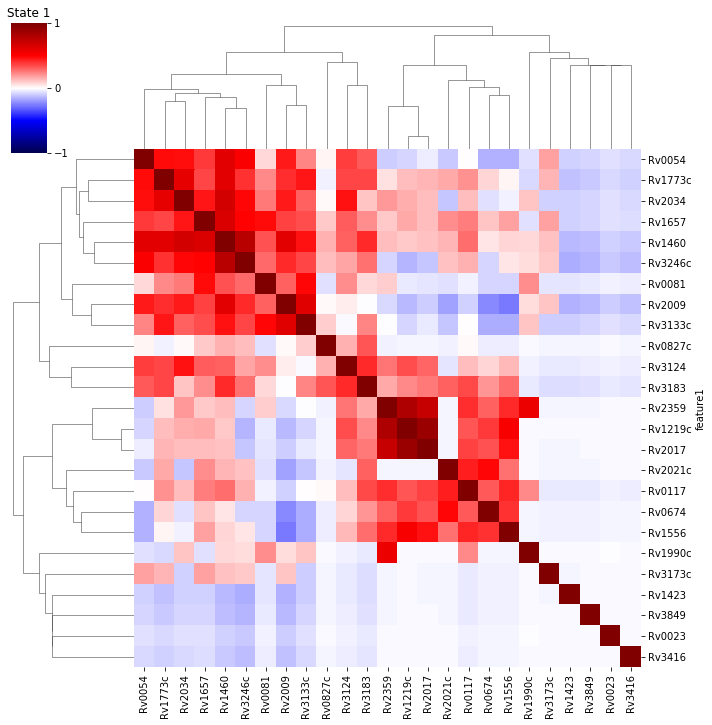

<Figure size 432x288 with 0 Axes>

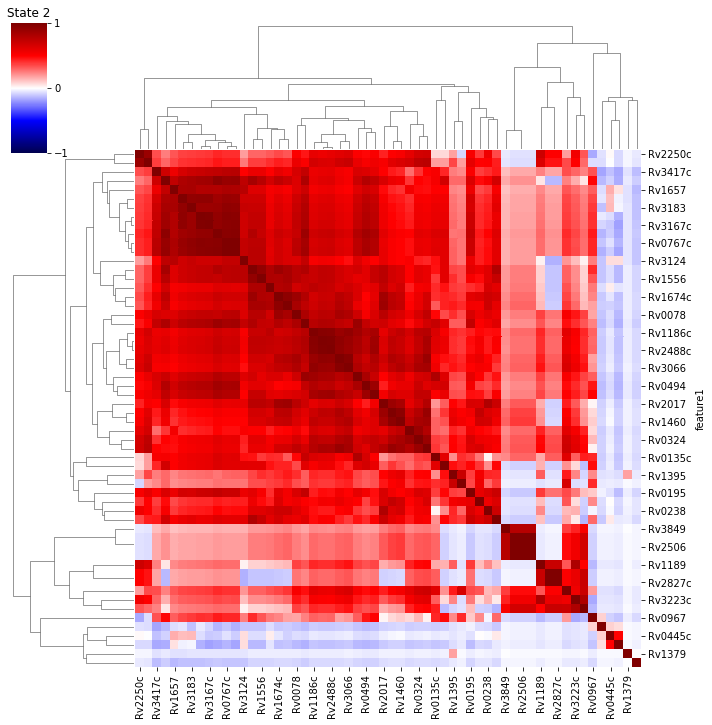

<Figure size 432x288 with 0 Axes>

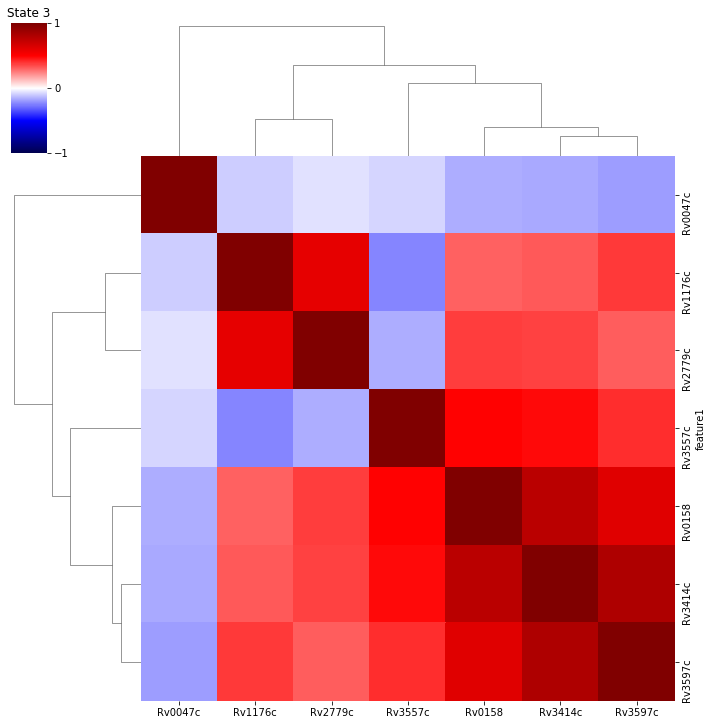

<Figure size 432x288 with 0 Axes>

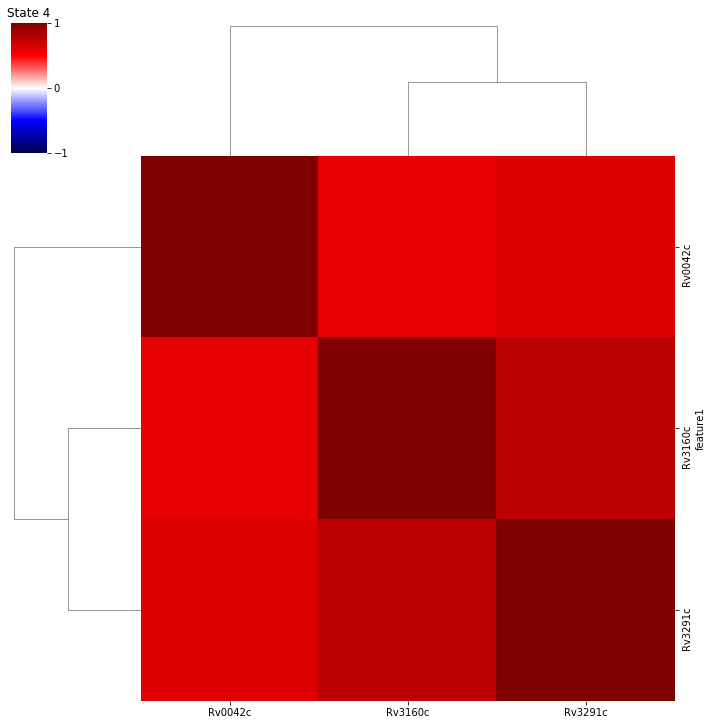

<Figure size 432x288 with 0 Axes>

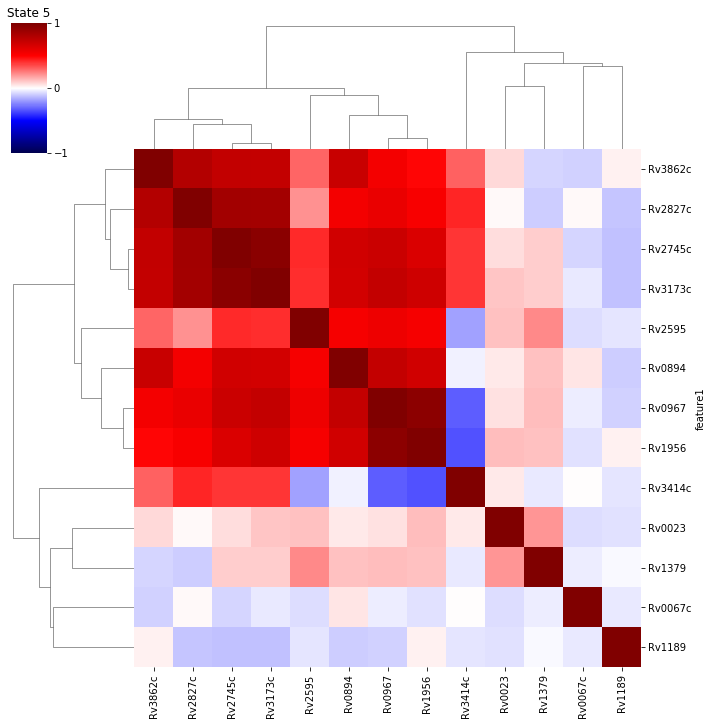

In [20]:
for state in STATES:
    _ = plt.figure()
    plotCPC(state)

In state 2, Rv0602c has he largest SFA. However, this gene does not appear in the CPC matrix.